## Importation des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)


## ÉTAPE 1 — Charger et comprendre la base

In [3]:
# Charger la base Excel
df = pd.read_excel("../data/donnees_ecommerce.xlsx")

# Aperçu
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# ***Information sur le jeu de donnee***

-  Le jeu de donnee compte 541909 lignes et 8 colonnes
-  La base compte 4 varibles de tupes Objets et 3 variables int64 et une varaible de datetime
-  La variabld Description a 1454 valeur manquantes
#### -  Pourquoi je n’ai pas supprimé toutes les valeurs nulles ?

-  Parce que :

-  Certaines colonnes peuvent avoir des valeurs manquantes non critiques (ex : Description, Région, etc.)

-  D’autres colonnes sont essentielles (CustomerID, Date, Montant) → là, on doit agir.

-  En Data Mining, on choisit quoi supprimer, quoi remplir, quoi conserver.

-  Le RFM ne se soucie pas de la multicolinéarité.

-  Chaque axe (R, F, M) est traité indépendamment pour donner un score.


## 2. Comprendre la structure

In [4]:
# Dimensions
df.shape

(541909, 8)

In [5]:
# Informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [42]:
# Statistiques descriptives
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,392732.000000,392732,392732.000000,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822,22.629195
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.390000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,181.588420,NaN,22.240725,1713.567773,311.083465


## ÉTAPE 2 Nettoyage spécifique au RFM

In [7]:
# Valeurs manquantes
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Suppression des lignes sans CustomerID
df = df.dropna(subset=["CustomerID"])

In [9]:
# Vérification
df["CustomerID"].isnull().sum()

np.int64(0)

In [10]:
# Suppression des doublons
df = df.drop_duplicates()

In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## ÉTAPE 3 — Préparation des variables clés

-   Selon les bases e-commerce classiques, on va préparer :

In [46]:
# Suppression des quantités négatives (retours)
df = df[df["Quantity"] > 0]
# Création du montant total si nécessaire
if "Quantity" in df.columns and "UnitPrice" in df.columns:
    df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]
    

## ÉTAPE 4 — Analyse exploratoire de base

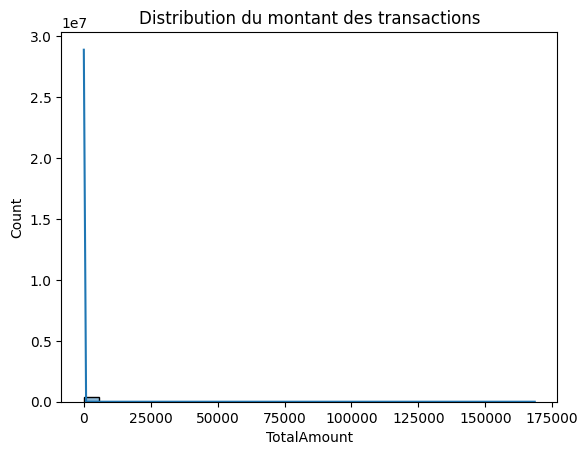

In [14]:
# Distribution des montants
if "TotalAmount" in df.columns:
    plt.figure()
    sns.histplot(df["TotalAmount"], bins=30, kde=True)
    plt.title("Distribution du montant des transactions")
    plt.show()

La majorité des transactions sont de faible valeur. C'est le comportement standard : beaucoup de petits achats et quelques rares achats très coûteux.

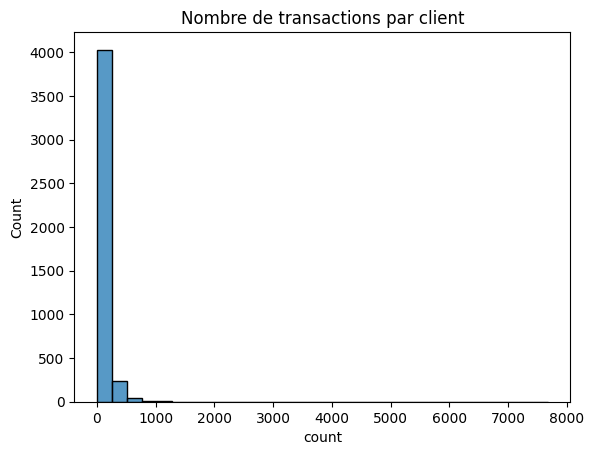

In [15]:
# Nombre de transactions par client
if "CustomerID" in df.columns:
    orders_per_customer = df["CustomerID"].value_counts()
    plt.figure()
    sns.histplot(orders_per_customer, bins=30)
    plt.title("Nombre de transactions par client")
    plt.show()

# ***Objectif du notebook***

Segmenter les clients selon leur comportement d’achat à partir de trois dimensions :
-  R (Recency) : récence du dernier achat

-  F (Frequency) : fréquence d’achat

-  M (Monetary) : montant total dépensé

## 5. Construction de la table RFM

-  Définir la date de référence

In [16]:
#Cette commande sert à définir le point de repère temporel à partir duquel tu vas calculer la Récence de tes clients.
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

-  Calculer R, F et M

In [17]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                    # Frequency
    "TotalAmount": "sum"                                       # Monetary
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


## 6. Analyse descriptive des variables RFM

In [19]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.518322,4.271952,2048.215924
std,1721.889758,100.009747,7.705493,8984.248352
min,12346.000000,1.000000,1.000000,0.000000
25%,13812.500000,18.000000,1.000000,306.455000
50%,15299.000000,51.000000,2.000000,668.560000
75%,16778.500000,142.000000,5.000000,1660.315000
max,18287.000000,374.000000,210.000000,280206.020000


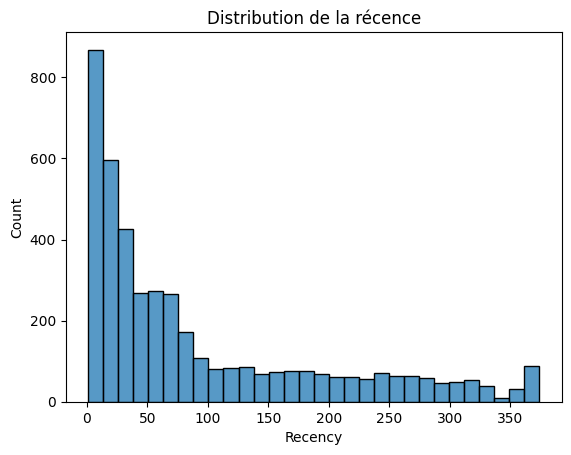

In [21]:
plt.figure()
sns.histplot(rfm["Recency"], bins=30)
plt.title("Distribution de la récence")
plt.show()

-  L’histogramme de la récence montre une forte concentration de clients avec une récence faible, ce qui signifie que beaucoup de clients ont effectué un achat récemment.
-  Cela indique une base client active. En revanche, on observe également une distribution étalée vers des valeurs élevées, traduisant l’existence de clients inactifs ou à risque de churn, dont le dernier achat remonte à longtemps.

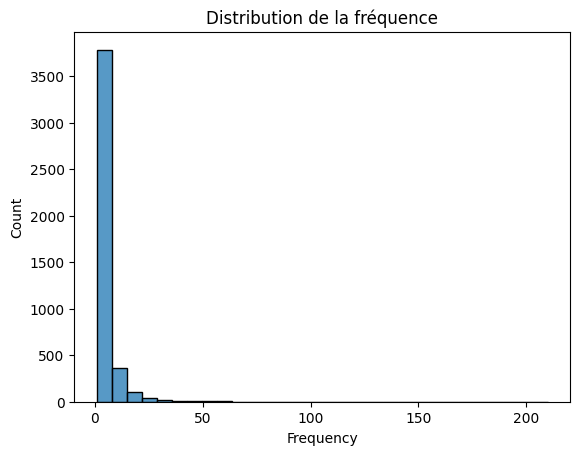

In [22]:
plt.figure()
sns.histplot(rfm["Frequency"], bins=30)
plt.title("Distribution de la fréquence")
plt.show()

-  Une barre immense écrase tout le reste à gauche (entre 1 et 10 achats). La quasi-totalité de tes clients sont des acheteurs occasionnels.

-  L’histogramme de la fréquence montre que la majorité des clients ont effectué un nombre limité d’achats, ce qui traduit une forte proportion de clients occasionnels.

-  Toutefois, on observe une queue vers la droite, indiquant l’existence d’un groupe plus restreint de clients très actifs qui réalisent de nombreuses transactions.


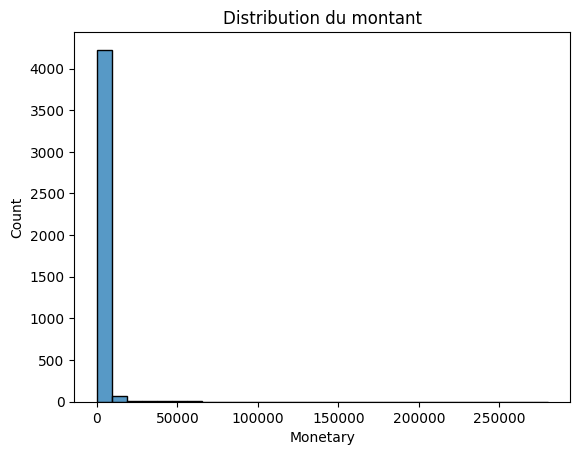

In [23]:
plt.figure()
sns.histplot(rfm["Monetary"], bins=30)
plt.title("Distribution du montant")
plt.show()


-  L’histogramme du montant montre une distribution asymétrique, avec une majorité de clients générant un chiffre d’affaires relativement faible, tandis qu’une minorité de clients contribue de manière significative au revenu total.
-  Cette concentration de la valeur sur un petit nombre de clients met en évidence l’importance stratégique des clients à forte valeur.

## 7. Attribution des scores RFM (quintiles)

In [29]:
# C'est l'étape où tu transformes des valeurs brutes (jours, nombre d'achats, euros) en scores comparatifs.
#Cependant, attention : si tu "drop" les doublons, tu auras moins de 4 labels (par exemple, au lieu de scores 
# On gère la fréquence en forçant des rangs uniques avant le découpage
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm["R_score"] = pd.qcut(rfm["Recency"].rank(method='first'), 5, labels=[5, 4, 3, 2, 1])
rfm["M_score"] = pd.qcut(rfm["Monetary"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

## 8. Score RFM global

In [35]:
rfm["RFM_Score"] = (
    rfm["R_score"].astype(str) +
    rfm["F_score"].astype(str) +
    rfm["M_score"].astype(str)
)

rfm["RFM_Score"].head()


0    115
1    555
2    244
3    414
4    112
Name: RFM_Score, dtype: object

| RFM_Score | Signification                                                                    |
| --------- | -------------------------------------------------------------------------------- |
| **555**   | Client très récent, très fréquent, très rentable → ⭐ Client champion             |
| **115**   | Client ancien, peu fréquent, peu rentable → ❌ Client inactif                     |
| **244**   | Client moyennement récent, peu fréquent, valeur moyenne → ⚠️ Client à développer |
| **414**   | Client récent, peu fréquent, valeur élevée → 💰 Client à potentiel               |
| **112**   | Client ancien, peu fréquent, faible valeur → 🚨 Client perdu ou dormant          

Le score RFM combine la récence, la fréquence et la valeur monétaire en un indicateur unique à trois chiffres. Plus le score est élevé, plus le client est récent, fidèle et rentable. Ce score permet de classer rapidement les clients en segments stratégiques afin d’adapter les actions marketing (fidélisation, relance, promotion).


In [38]:
rfm["R_score"] = rfm["R_score"].astype(str)
rfm["F_score"] = rfm["F_score"].astype(str)
rfm["M_score"] = rfm["M_score"].astype(str)


## 9. Segmentation des clients

In [39]:
def segment_rfm(row):
    if row["R_score"] == "5" and row["F_score"] == "5" and row["M_score"] == "5":
        return "Clients champions"
    elif row["R_score"] >= "4" and row["F_score"] >= "4":
        return "Clients fidèles"
    elif row["R_score"] >= "4":
        return "Clients récents"
    elif row["F_score"] >= "4":
        return "Clients fréquents"
    elif row["M_score"] >= "4":
        return "Clients à forte valeur"
    elif row["R_score"] <= "2":
        return "Clients à risque"
    else:
        return "Clients standards"

rfm["Segment"] = rfm.apply(segment_rfm, axis=1)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,5,115,Clients à forte valeur
1,12347.0,2,7,4310.00,5,5,5,555,Clients champions
2,12348.0,75,4,1797.24,2,4,4,244,Clients fréquents
3,12349.0,19,1,1757.55,4,1,4,414,Clients récents
4,12350.0,310,1,334.40,1,1,2,112,Clients à risque


Interprétation par client
***Client 12346***

Recency = 326 jours → n’a pas acheté depuis longtemps ❌

Frequency = 1 → achète rarement ❌

Monetary = 77 183,60 → dépense très élevée ✅

RFM = 115 → ancien, rare, mais très rentable
➡️ Segment : Clients à forte valeur
👉 Stratégie : relance personnalisée (client à récupérer absolument).

***Client 12347***

Recency = 2 jours → achat très récent ✅

Frequency = 7 → achète souvent ✅

Monetary = 4 310,00 → bonne valeur ✅

RFM = 555 → excellent sur tous les critères
➡️ Segment : Clients champions
👉 Stratégie : fidélisation maximale, offres VIP, avantages exclusifs.

***Client 12348***

Recency = 75 jours → achat moyennement récent ⚠️

Frequency = 4 → achète régulièrement ✅

Monetary = 1 797,24 → valeur moyenne ✅

RFM = 244
➡️ Segment : Clients fréquents
👉 Stratégie : renforcer la fidélité avec des promotions ciblées.

***Client 12349***

Recency = 19 jours → achat récent ✅

Frequency = 1 → achète rarement ❌

Monetary = 1 757,55 → bonne valeur ✅

RFM = 414
➡️ Segment : Clients récents
👉 Stratégie : encourager un second achat rapidement.

***Client 12350***

Recency = 310 jours → ancien client ❌

Frequency = 1 → très peu d’achats ❌

Monetary = 334,40 → faible valeur ❌

RFM = 112
➡️ Segment : Clients à risque
👉 Stratégie : campagne de réactivation ou abandon stratégique.

## 10. Analyse des segments

In [40]:
rfm["Segment"].value_counts()

Segment
Clients à risque          1279
Clients fidèles            774
Clients fréquents          615
Clients récents            615
Clients standards          448
Clients champions          347
Clients à forte valeur     261
Name: count, dtype: int64

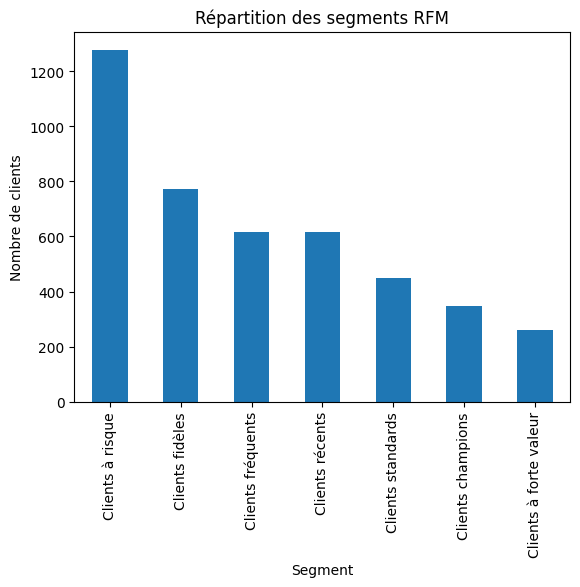

In [41]:
plt.figure()
rfm["Segment"].value_counts().plot(kind="bar")
plt.title("Répartition des segments RFM")
plt.ylabel("Nombre de clients")
plt.show()


## Conclusion globale

Le modèle RFM permet de distinguer clairement les clients stratégiques (champions, forte valeur, fréquents) de ceux à risque ou inactifs. 
Cette segmentation facilite la mise en place de stratégies marketing ciblées : fidélisation, relance, ou optimisation des ressources commerciales.